In [ ]:
def prom(x):
  return (x[0:len(x)-1]+ x[1:len(x)])/2


In [ ]:
#@title Librerias
import scipy as scp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicHermiteSpline
from scipy.interpolate import CubicSpline
from scipy.interpolate import BarycentricInterpolator
from numpy.polynomial.polynomial import Polynomial
import sympy as sym
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



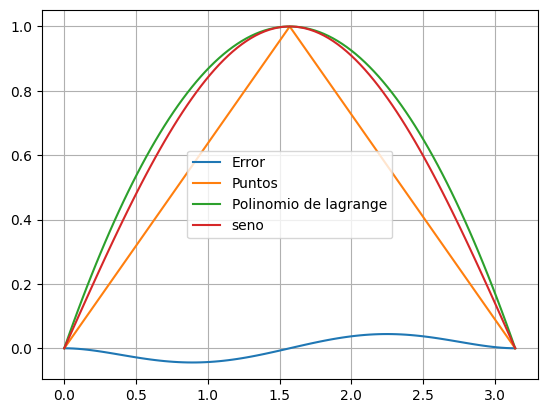

In [ ]:
#Aqui va su código
f = lambda x: np.sin(x)
x = np.array([0, np.pi/2, np.pi])
x_complete = np.linspace(0, np.pi, 100)
y = f(x)
f_error = lambda x: -np.sin(x)*(x-0)*(x - np.pi/2)*(x - np.pi)/(4*3*2)
poly = scp.interpolate.lagrange(x, y)
plt.plot(x_complete, f_error(x_complete), label = 'Error')
plt.plot(x,y, label = 'Puntos')
plt.plot(x_complete, poly(x_complete), label = 'Polinomio de lagrange')
plt.plot(x_complete, f(x_complete), label = 'seno')
plt.legend()
plt.grid()


# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

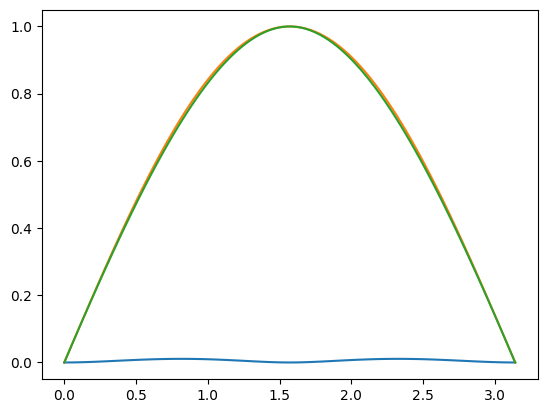

In [ ]:
f = lambda x: np.sin(x)
x = np.array([0, np.pi/2, np.pi])
x_complete = np.linspace(0, np.pi, 100)
y = f(x)
dy = lambda x: np.cos(x)
poly = scp.interpolate.CubicHermiteSpline(x, y, dy(x))
plt.plot(x_complete, f(x_complete)- poly(x_complete), label = 'Error')
plt.plot(x_complete, f(x_complete), label = 'Puntos')
plt.plot(x_complete, poly(x_complete), label = 'Polinomio de Hermite')

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [ ]:
f = lambda x: 67642.34861111111/((x-78)**2 + (55**2)/4)
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
Energia = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
Sigma_cero = []
for i in range(len(sigma_exp)):
  sigma_cero = sigma_exp[i]*(((Energia[i]-78)**2)+ (55**2)/4)
  Sigma_cero.append(sigma_cero)
print(Sigma_cero)
sigma_0 = np.mean(Sigma_cero)
print(sigma_0)


[72506.65, 57044.0, 69311.25, 63898.375, 65485.2, 59008.475, 64154.700000000004, 83863.3125, 73509.175]
67642.34861111111


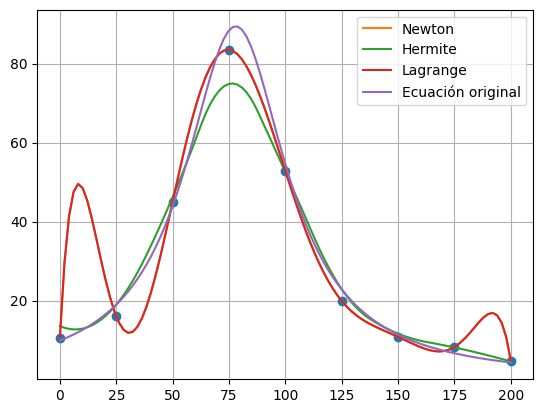

In [ ]:
P_lagrange = lagrange(Energia, sigma_exp)
P_newton = BarycentricInterpolator(Energia, sigma_exp)
P_hermite = CubicHermiteSpline(prom(Energia), prom(sigma_exp), np.diff(sigma_exp)/np.diff(Energia))
Pol =  np.poly1d(P_lagrange)
x = np.linspace(0, 200, 100)
plt.plot(Energia, sigma_exp, 'o')
plt.plot(x, P_newton(x), label = 'Newton')
plt.plot(x, P_hermite(x), label = 'Hermite')
plt.plot(x, Pol(x), label = 'Lagrange')
plt.plot(x, f(x), label = 'Ecuación original')
plt.legend()
plt.grid()


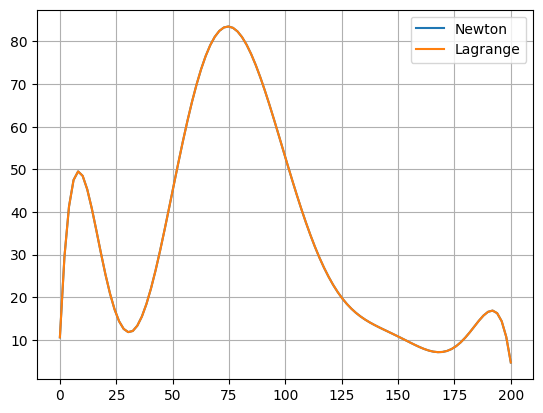

In [ ]:
plt.plot(x, P_newton(x), label = 'Newton')
plt.plot(x, Pol(x), label = 'Lagrange') #Llegaron a la misma conclusión
plt.legend()
plt.grid()

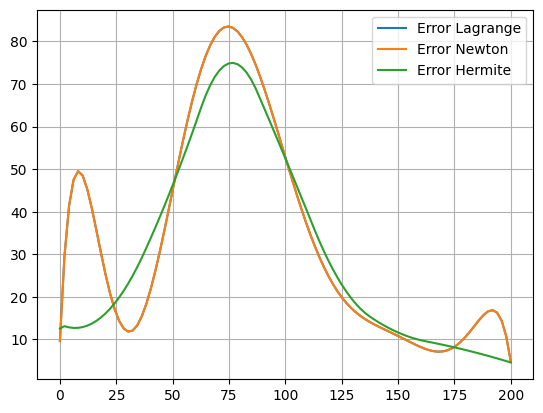

In [ ]:
error_l = []
error_n = []
error_h = []
x = np.linspace(0, 200, 100)
for i in x:
  error_l.append(abs(f(i) - P_lagrange(i)))
  error_n.append(abs(f(i) - P_newton(i)))
  error_h.append(abs(f(i) - P_hermite(i)))
plt.plot(x, error_l, label = 'Error Lagrange')
plt.plot(x, error_n, label = 'Error Newton')
plt.plot(x, error_h, label = 'Error Hermite')
plt.legend() #Lagrange y Newton tuvieron el mismo error, Hermite fue el que tuvo menor error por ende
plt.grid()


In [ ]:
error_l = np.array(error_l)
error_n = np.array(error_n)
error_h = np.array(error_h)
print('Error Lagrange promedio = ', error_l.mean(),'Error Newton promedio =', error_n.mean(),'Error Hermite promedio =', error_h.mean())

Error Lagrange promedio =  33.27523973562515 Error Newton promedio = 33.275239735394486 Error Hermite promedio = 30.275402447089924


#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

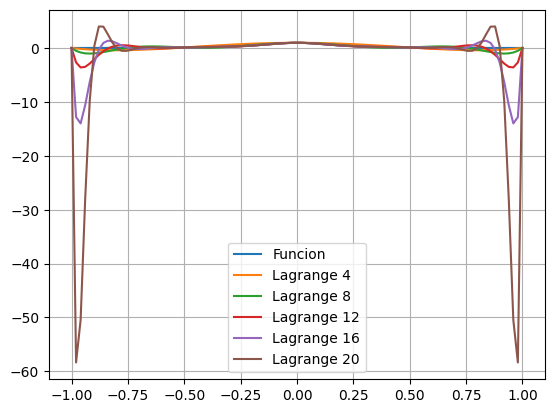

N = 4  0.13793103448275867 N = 8  0.13793103448275756 N = 12 0.13793103448275057 N = 16 0.13793103448278188 N = 20  0.13793103448195454 N Real 0.13793103448275862


In [ ]:
f = lambda x: 1/(1+ (25*x**2))
x = np.linspace(-1, 1, 100)
lagrange_4 = lagrange(np.linspace(-1, 1, 5), f(np.linspace(-1, 1, 5)))
lagrange_8 = lagrange(np.linspace(-1, 1, 9), f(np.linspace(-1, 1, 9)))
lagrange_12 = lagrange(np.linspace(-1, 1, 13), f(np.linspace(-1, 1, 13)))
lagrange_16 = lagrange(np.linspace(-1, 1, 17), f(np.linspace(-1, 1, 17)))
lagrange_20 = lagrange(np.linspace(-1, 1, 21), f(np.linspace(-1, 1, 21)))
plt.plot(x, f(x), label = 'Funcion')
plt.plot(x, lagrange_4(x), label = 'Lagrange 4')
plt.plot(x, lagrange_8(x), label = 'Lagrange 8')
plt.plot(x, lagrange_12(x), label = 'Lagrange 12')
plt.plot(x, lagrange_16(x), label = 'Lagrange 16')
plt.plot(x, lagrange_20(x), label = 'Lagrange 20')
plt.legend()
plt.grid()
plt.show()
x = sym.Symbol('x')
print('N = 4 ', lagrange_4(0.5), 'N = 8 ',lagrange_8(0.5), 'N = 12',lagrange_12(0.5), 'N = 16' , lagrange_16(0.5), 'N = 20 ' , lagrange_20(0.5), 'N Real', f(0.5))

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



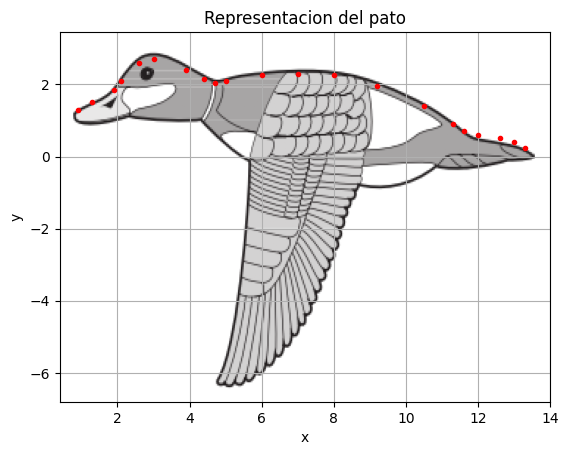

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
yp = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])
xp_prime = prom(xp)
yp_prime = prom(yp)


# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

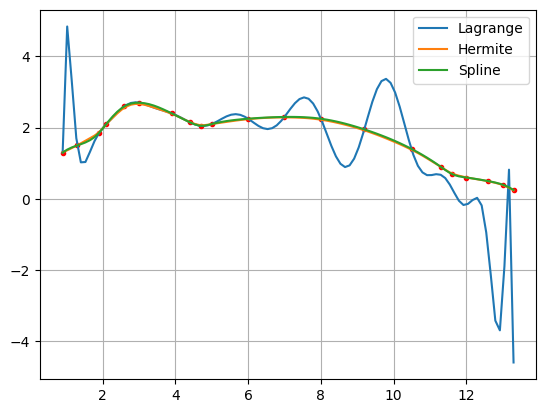

In [ ]:
dx = np.diff(xp)
dy = np.diff(yp)
dydx = dy/dx
P_pato_lagrange = lagrange(xp, yp)
P_pato_hermite = CubicHermiteSpline(xp_prime, yp_prime, dydx)
P_pato_spline = CubicSpline(xp, yp)
x = np.linspace(0.9, 13.3, 100)
plt.plot(xp, yp, '.r')
Pato_Lg = plt.plot(x, P_pato_lagrange(x), label = 'Lagrange')
Pato_H = plt.plot(x, P_pato_hermite(x), label = 'Hermite')
Pato_CS = plt.plot(x, P_pato_spline(x), label = 'Spline')
plt.legend()
plt.grid()
plt.show()



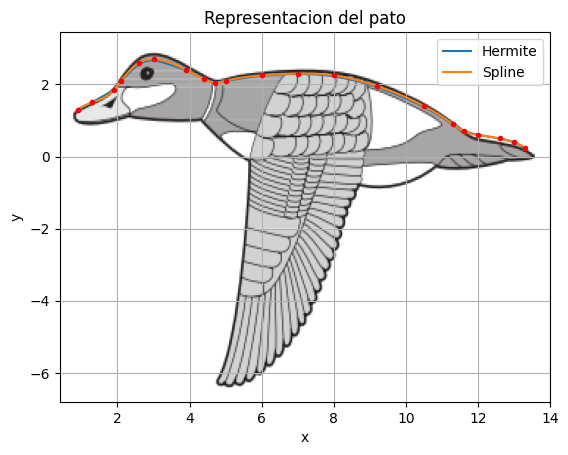

In [ ]:
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.plot(x, P_pato_hermite(x), label = 'Hermite')
plt.plot(x, P_pato_spline(x), label = 'Spline')
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

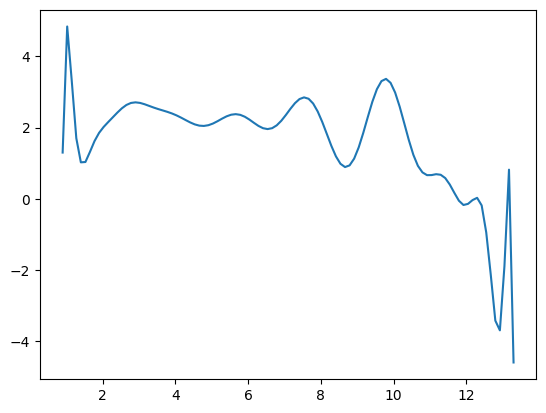

In [ ]:
plt.plot(x, P_pato_lagrange(x))
#El pato de Lagrange presenta más fluctuaciones debido a que no es un polinomio y son bastante puntos (x,y) que interpolar